In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

df.rename(columns={
    'Annual Income (k$)' : 'Annual_Income',
    'Spending Score (1-100)' : 'Spending_Score'
}, inplace=True)

Data Understanding

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Feature Selection

In [4]:
X = df[['Age', 'Annual_Income', 'Spending_Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elbow Method

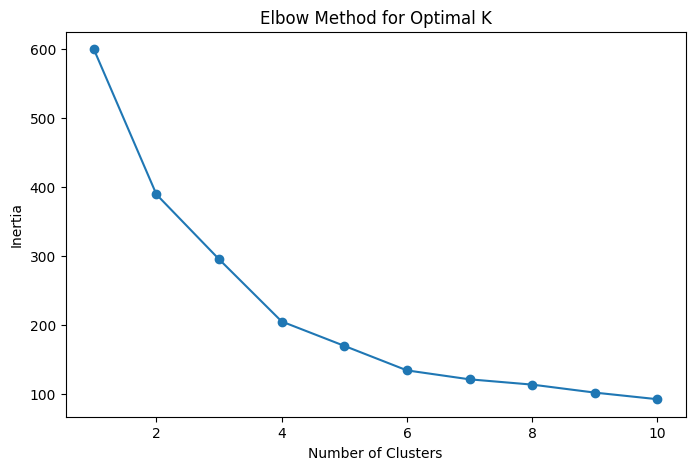

In [5]:
inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

Training Model K-Means

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Visualisasi Clustering

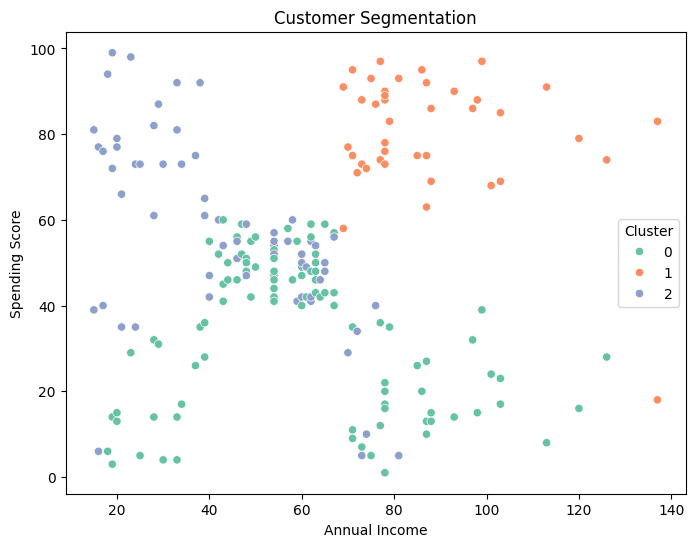

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual_Income'],
    y=df['Spending_Score'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()



Interpretasi Cluster (VERSI MANUSIA)

In [8]:
df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()

,Age,Annual_Income,Spending_Score
Cluster,,,
0,50.406250,60.468750,33.343750
1,32.853659,87.341463,79.975610
2,25.142857,43.269841,56.507937


Analisis dan Interpetasi Cluster

In [9]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()
cluster_summary

,Age,Annual_Income,Spending_Score
Cluster,,,
0,50.406250,60.468750,33.343750
1,32.853659,87.341463,79.975610
2,25.142857,43.269841,56.507937
